# Introduction to Causal Inference

# What causes what? 

Observational data (i.e., data recorded from human activity) and big data sources in particular are rife with spurious correlations between variables that appear to be associated in a model but are not causally linked. As a result, many models would pick some interesting associations in the data, which may appear statistically significant but likely lack practical significance. If the goal is to implement a new policy or interventions that may introduce change in the social world, we need knowledge about the underlying causal structure of the problem — what causes what. Specifically, we would like to know the effect of a particular _treatment_ (any policy or intervention, for example, Work from Home) on an _Outcome_ (for example, Number of coronavirus cases) and compare the observed effect to a counterfactual question, for example, 'What would have been the Number of coronavirus cases if a Work from home policy was not introduced?'.

Causal graphs or DAGs (Directed Acyclical Graphs) are a useful tool for drawing intuitive pictures that:
* Reflect our assumptions about our treatment, outcome, and associated factors. 
* Highlight possible sources of bias (e.g., confounding) which may otherwise be unnoticed.
* Improve our data analysis for causal inference.

In a causal graph (see Figure 1 below), each variable has a corresponding node, and the arrows reflect the direction of causation we assume of the basis of domain knowledge.

## Learning resources

<i class="fas fa-book"></i> <i class="fas fa-code"></i> Scott Cunningham. [Chapter 3: Directed Acyclical Graphs](https://mixtape.scunning.com/dag.html) in [Causal Inference: The Mixtape.](https://mixtape.scunning.com/index.html) Yale University Press.  

<i class="fas fa-book"></i> <i class="fas fa-code"></i> <i class="fas fa-play-circle"></i> [Chapter 6. The Haunted DAG & The Causal Terror](https://xcelab.net/rm/statistical-rethinking/) in Richard McElreath's Statistical Rethinking book and associated [video lecture](https://www.youtube.com/watch?v=l_7yIUqWBmE).

<i class="fas fa-play-circle"></i> Miguel Hernán. [Causal Diagrams: Draw Your Assumptions Before Your Conclusions](https://www.edx.org/course/causal-diagrams-draw-your-assumptions-before-your). edX.

<i class="fas fa-book"></i> Kosuke Imai. [Chapter 2: Causality](http://assets.press.princeton.edu/chapters/s2-11025.pdf) in Quantitative Social Science. Princeton University Press.
 
<i class="fas fa-book"></i> Stephen L. Morgan and Christopher Winship. Counterfactuals and Causal Inference. Cambridge University Press.

<i class="fas fa-book"></i> Hernán MA, Robins JM (2020). [Causal Inference: What If.](https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2021/03/ciwhatif_hernanrobins_30mar21.pdf) Boca Raton: Chapman & Hall/CRC.

<i class="fas fa-scroll"></i> Miguel Hernán, John Hsu, and Brian Healy. [A Second Chance to Get Causal Inference Right: A Classification of Data Science Tasks.](https://amstat.tandfonline.com/doi/pdf/10.1080/09332480.2019.1579578?needAccess=true) CHANCE.


# Confounding—basic definitions

To keep things concrete, in this lab, we will use DAGs to shed some light on the problem of confounding with a focus on two common confounds: (2) the fork and (3) the collider. In particular, we will discuss the collider confound as the 'fork' confound is typically well understood in the social sciences. 


## Definitions
* **Confounding**: any interference such that the effect of predictors X on an outcome of interest Y is not the same as it would have been had we experimentally determined the predictors X. In experimental settings, we have treatment and control groups that are comparable with respect to every characteristic related to the outcome with the only difference being that the treatment group received the treatment and the control group did not.

    * **Fork**: A variable Y is a common cause of X and Z, inducing a spurious correlation between them. This is the most common example of confounding (see [Kosuke Imai's Quantitative Social Science, page 57](https://assets.press.princeton.edu/chapters/s2-11025.pdf)).

    * **Collider**: Relationship between X and Z does not exist unless we condition on Y, which is a collider variable (because the paths from X and Z collide in Y).

<img src="https://miro.medium.com/max/4800/1*bmORaFV5mKqUTaML7ib_Rw.png" width="600" height="300"/>

Figure 1. [DAG representation](https://medium.com/@akelleh/a-technical-primer-on-causality-181db2575e41) of fork (left) and collider (right). Source: [A Technical Primer On Causality](https://medium.com/@akelleh/a-technical-primer-on-causality-181db2575e41) by Adam Kelleher.

# Our example of collider bias

Many canonical examples of collider bias exist in the literature, but we will develop our own example using a data set we know well — the Understanding Society Covid-19 survey data.  

Consider a situation in which both variables Working from home and Age have an effect on the Risk of getting Covid-19 but are not correlated between each other in the entire data set. Then we condition on the respondents who considered the risk for getting Covid-19 'Very likely' as an example of problematic conditioning on a collider variable. After this problematic conditioning, we observe a strong negative relationship between Age and Work from home. In short, Work from home and Age are not correlated in the population but get correlated once conditioning on perceived very high risk of getting Covid-19, introducing collider bias. Of course, in this example we use survey data, and not many would condition on 'Very likely' risk of getting Covid-19, but in many observational data sets, we may have data only about a pre-selected subset of the population so our data may contain such problematic selection, introducing collider bias, by design.

# Drawing causal graphs

To visualise our example as a causal graph, we will use the R package [`ggdag`](https://cran.r-project.org/web/packages/ggdag/ggdag.pdf). This [tutorial](https://cran.r-project.org/web/packages/ggdag/vignettes/bias-structures.html) by Malcolm Barrett gives a good overview of `ggdag` and its capabilities.

In order to run R in a Python Jupyter, we need to install the `rpy2` package which provides Python interface to the R language.

In [1]:
!pip install rpy2

# To enable the %%R cell magic command, which turns a cell to be
# interpreted as an R code, we execute %load_ext rpy2.ipython.
%load_ext rpy2.ipython

Now we can run R code in a cell by adding the R cell magic command `%%R`.

In [2]:
%%R
#install.packages('ggdag') # you will need to select a CRAN mirror from where 
# to install the package; for example, typing in '70' will select UK London  
library(ggdag)
theme_set(theme_dag())

R[write to console]: Loading required package: ggplot2



R[write to console]: 
Attaching package: ‘ggdag’




R[write to console]: The following object is masked from ‘package:stats’:

    filter




Import the `ggdag` package.  

In [3]:
%%R
library(ggdag)
theme_set(theme_dag())

In our model, we assume that both variables _Work from home_ and _Age_ affect the outcome variable, _Risk of getting Covid-19_. We also assume that _Working at home_ and _Age_ are not causally connected. Below we represent our simple model using a causal graph. The node where _Work from home_ and _Age_ arrowheads meet is called a collider, meaning that both variables collide there. Let's now plot a causal graph with our three variables.

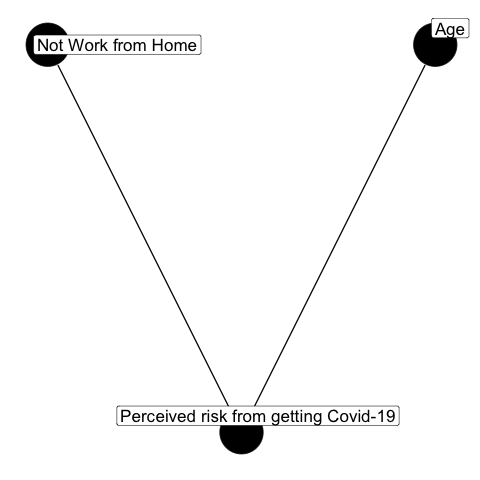

In [4]:
%%R
RiskCovid_dag <- collider_triangle(x = "Not Work from Home", 
                  y = "Age", 
                  m = "Perceived risk from getting Covid-19") 

ggdag(RiskCovid_dag, text = FALSE, use_labels = "label", node_size = 20, text_size = 6)

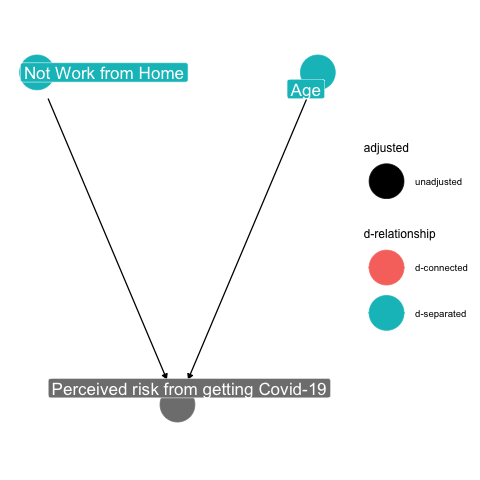

In [5]:
%%R
ggdag_dseparated(RiskCovid_dag, text = FALSE, use_labels = "label", text_size = 6)

Although Work from home and Age are not correlated in the population, they may get correlated once we condition on Very high risk of getting Covid-19. The square shape of the variable _Risk of getting Covid-19_ indicates that we condition on that variable being a certain value, in our case on people with Very high perceived risk of getting Covid-19.

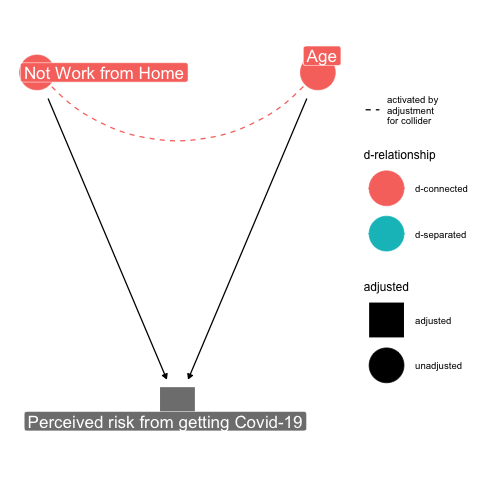

In [6]:
%%R
ggdag_dseparated(RiskCovid_dag, controlling_for = "m",
                 text = FALSE, use_labels = "label", text_size = 6)

# Statistical Models in Python

We will now perform our analysis to see how conditioning in a model can introduce a collider bias. 

In this lab, we will use the Python library [`statsmodels`](https://www.statsmodels.org/devel/examples/index.html). `statsmodels` is a Python module that provides functions for the estimation of many different statistical models.

<img src="https://www.statsmodels.org/devel/_images/statsmodels-logo-v2-horizontal.svg" width="400" height="200"/>


# Collider confounder

We will use data from [Understanding Society Covid-19](https://www.understandingsociety.ac.uk/topic/covid-19) (Wave 6, November 2021, web collected) to demonstrate the causal structure of collider confounder. Let's first load the survey data.

In [7]:
# Import the Drive helper
from google.colab import drive

# This will prompt for authorization.
# Enter your authorisation code and rerun the cell.
drive.mount("/content/drive")

ModuleNotFoundError: No module named 'google'

In [1]:
import pandas as pd

USocietyCovid = pd.read_csv(
    "/content/drive/My Drive/Understanding_Society_Covid19_Wave6_November2020.csv"
)
USocietyCovid.head(0)  # display headings only as the data is safeguarded

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,i_hidp,j_hidp,k_hidp,i_ioutcome,...,cf_ff_intm,cf_ff_inty,cf_ff_country,cf_gor_dv,cf_aid_dv,cf_betaindin_xw,cf_betaindin_xw_t,cf_betaindin_lw,cf_betaindin_lw_t1,cf_betaindin_lw_t2


### Variables

To make things concrete, let's select three variables. 

|Variable in Our Model | Description| Variable Name | Values 
|---| ---| ---|---|
| X | Working at home| cf_wah | 1 = Always, 2 = Often, 3 = Sometimes, 4 = Never
| Z | Age | cf_age | Integer values (whole numbers)
| Y | Risk of getting covid19 | cf_riskcv19 | 1 = Very likely, 2 = Likely, 3 = Unlikely, 4 = Very unlikely

In [ ]:
# Select and preprocesses our variables from the Understanding Society Study
USocietyCovidCollider = USocietyCovid[["cf_wah", "cf_age", "cf_riskcv19"]]
USocietyCovidCollider = USocietyCovidCollider.mask(USocietyCovidCollider < 0)
USocietyCovidCollider = USocietyCovidCollider.dropna().astype(int)
USocietyCovidCollider

,cf_wah,cf_age,cf_riskcv19
0,1,37,4
2,3,55,3
3,2,38,4
5,4,63,3
6,3,56,4
...,...,...,...
12026,3,41,3
12028,4,39,3
12029,1,41,4
12030,1,57,4


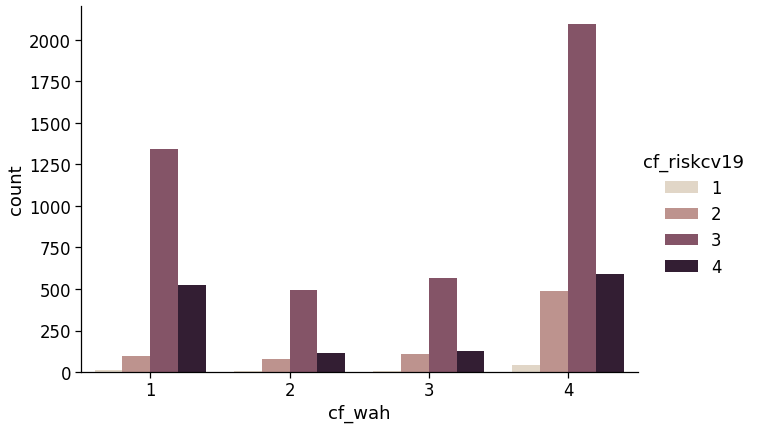

In [ ]:
# Work at home versus risk of getting covid
import seaborn as sns

sns.set_context("notebook", font_scale=1.5)

fig = sns.catplot(
    x="cf_wah",
    kind="count",
    hue="cf_riskcv19",
    height=6,
    aspect=1.5,
    palette="ch:.25",
    data=USocietyCovidCollider,
)

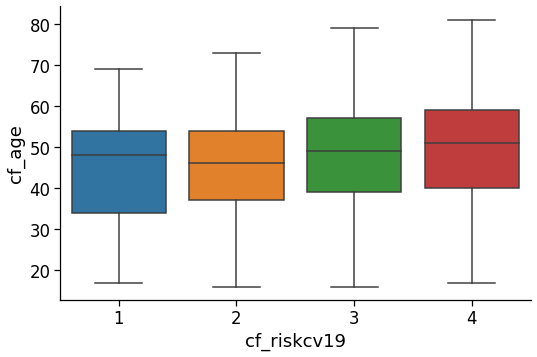

In [ ]:
# Risk of getting Covid versus age

fig = sns.catplot(
    x="cf_riskcv19",
    y="cf_age",
    kind="box",
    height=5,
    aspect=1.5,  # control plot size
    sharey=False,  # set different y axes for each plot
    data=USocietyCovidCollider,
)

In [ ]:
# Correlate the variables using the corr() function in pandas
USocietyCovidCollider.corr()

,cf_wah,cf_age,cf_riskcv19
cf_wah,1.000000,-0.013254,-0.138858
cf_age,-0.013254,1.000000,0.099640
cf_riskcv19,-0.138858,0.099640,1.000000


Work at home is negatively correlated with Risk of getting Covid, indicating that people who Never work at home perceive greater risk of getting Covid-19. 

Age is positively correlated, indicating that perceived risk of getting Covid decreases with age. 

_Note:_ The variable Risk of getting Covid measures perceived risk, which is different from actual risk or health outcome after different age groups get Covid-19.

In [ ]:
# Instead of correlation, we can model the variables using GLM
# with outcome Risk of getting Covid and predictors Age and Work at home.
import statsmodels.formula.api as smf

LogReg = smf.glm("cf_riskcv19 ~ cf_age * cf_wah", data=USocietyCovidCollider).fit()
print(LogReg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            cf_riskcv19   No. Observations:                 6683
Model:                            GLM   Df Residuals:                     6679
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.34066
Method:                          IRLS   Log-Likelihood:                -5882.4
Date:                Tue, 16 Mar 2021   Deviance:                       2275.3
Time:                        09:50:49   Pearson chi2:                 2.28e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0520      0.068     45.019

In [ ]:
# Although both Age and Work at home affect Risk of getting covid,
# the two predictors are not associated in the data set.

LogReg = smf.glm("cf_wah ~ cf_age", data=USocietyCovidCollider).fit()
print(LogReg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 cf_wah   No. Observations:                 6683
Model:                            GLM   Df Residuals:                     6681
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          1.7185
Method:                          IRLS   Log-Likelihood:                -11291.
Date:                Tue, 16 Mar 2021   Deviance:                       11481.
Time:                        09:41:55   Pearson chi2:                 1.15e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8545      0.063     45.536      0.0

Let's condition on the respondents who considered the risk for getting covid 'Very likely'. This is an example of problematic conditioning on a collider variable.

In [ ]:
# Create a collider variable — Very likely risk of getting covid.
# Select the respondents who considered the risk for getting covid 'Very likely'.

USocietyCovidColliderRisk = USocietyCovidCollider[
    USocietyCovidCollider["cf_riskcv19"] == 1
]

USocietyCovidColliderRisk

,cf_wah,cf_age,cf_riskcv19
443,4,27,1
619,4,25,1
890,4,49,1
1635,4,49,1
1969,4,28,1
...,...,...,...
11334,1,38,1
11457,4,29,1
11593,4,42,1
11702,4,48,1


After we condition on those who considered the risk for getting Covid-19 'Very likely', we observe a negative correlation between Age and Work at home. 

In [ ]:
# Correlate our variables
# Note that correlation coefficients for cf_riskcv19 are NaN. This is due to the
# fact that we selected only one category, hence correlation cannot be computed.

USocietyCovidColliderRisk.corr()

,cf_wah,cf_age,cf_riskcv19
cf_wah,1.000000,-0.185572,NaN
cf_age,-0.185572,1.000000,NaN
cf_riskcv19,NaN,NaN,NaN


### Questions
* Why Age and Work at home were uncorrelated in the population but are negatively correlated once we condition on those who perceive 'Very likely' risk of getting Covid?

# Additional material

The examples and code below are from [Chapter 3: Directed Acyclical Graphs](https://mixtape.scunning.com/dag.html) in Scott Cunningham's book [Causal Inference: The Mixtape](https://mixtape.scunning.com/index.html).

The original code is written by [Thomas Caputo](https://github.com/tomcaputo) and is available on [GitHub](https://github.com/tomcaputo/mixtape_learnr/blob/main/Python/Directed_Acyclical_Graphs.ipynb).   

# Gender discrimination and collider bias

Suppose we are interested in studying the effect of gender discrimination on earnings/wages. One approach would be to regress earnings on gender (Model 1 in the regression table below) which indeed shows that women are discriminated against. But then your model is criticised for not taking into account occupation. To address this criticism, you run another model that adjusts for occupation (Model 2 in the regression table below). The outputs of this second model indicates that women are not discriminated against; instead, they receive comparable (or even higher) pay. However, there is a problem in this second model too. Suppose that discrimination is mediated by occupation such that women tend to occupy worse jobs, which are payed less. In this scenario, by controlling for occupation we introduce bias. This is at odds with a widespread practice of adding more and more controls in a model. Such controls may not reduce but introduce bias. To get rid of the introduced bias in the discrimination example, we can condition on both occupation and ability, which is what Model 3 does in the regression table below. This unbiased conditional model confirms that women are discriminated against. In real-world settings, however, ability is unobserved, which would typically preclude us from estimating an unbiased effect of gender discrimination on earnings.

For a detailed account on of the discrimination example, see [Chapter 3: Directed Acyclical Graphs](https://mixtape.scunning.com/dag.html) in Scott Cunningham's book [Causal Inference: The Mixtape](https://mixtape.scunning.com/index.html).

In [4]:
!pip install Stargazer
import pandas as pd
import numpy as np
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [3]:
# Data generation and assumptions

data = pd.DataFrame(
    {
        # Half of the population is female.
        "female": np.random.binomial(1, 0.5, size=10000),
        # Innate ability is independent of gender
        "ability": np.random.normal(size=10000),
    }
)

# All women experience discrimination
data["discrimination"] = data.female.copy()
# Data generating processes
data["occupation"] = (
    1
    + 2 * data["ability"]
    + 0 * data["female"]
    - 2 * data["discrimination"]
    + np.random.normal(size=10000)
)

data["wage"] = (
    1
    - 1 * data["discrimination"]
    + 1 * data["occupation"]
    + 2 * data["ability"]
    + np.random.normal(size=10000)
)

data

,female,ability,discrimination,occupation,wage
0,1,0.099726,1,-1.223869,-1.247802
1,0,-1.781548,0,-1.954134,-5.485027
2,1,1.516262,1,1.858005,4.760583
3,0,-0.995852,0,-1.401073,-3.041161
4,0,0.251987,0,1.990522,2.982625
...,...,...,...,...,...
9995,1,1.554097,1,5.339169,8.511789
9996,1,-0.219406,1,-0.459321,-0.301864
9997,0,-0.760498,0,0.157653,-0.553857
9998,0,-0.297383,0,1.075582,0.123010


In [5]:
# Regression models
model1 = sm.OLS.from_formula("wage ~ female", data=data).fit()
model2 = sm.OLS.from_formula("wage ~ female + occupation", data=data).fit()
model3 = sm.OLS.from_formula("wage ~ female + occupation + ability", data=data).fit()

# Output the three regression model's results as Table
stargazer = Stargazer((model1, model2, model3))
stargazer.custom_columns(
    ["Biased Unconditional", "Biased", "Unbiased Conditional"], [1, 1, 1]
)

stargazer

#### Questions
* What is the true direct effect of discrimination on wages?
* Through what channels discrimination impacts wages?
* What makes occupation a collider?
* What control variables can get rid of the collider bias?

# References

Scott Cunningham. [Causal Inference: The Mixtape](https://mixtape.scunning.com/index.html). Yale University Press.

Thomas Caputo. [Teaching Resources for Causal Inference: The Mixtape](https://github.com/tomcaputo/mixtape_learnr). GitHub.  


Hernán MA, Robins JM (2020). [Causal Inference: What If](https://cdn1.sph.harvard.edu/wp-content/uploads/sites/1268/2021/01/ciwhatif_hernanrobins_31jan21.pdf). Boca Raton: Chapman & Hall/CRC.

Richard McElreath. Chapter 6: The Haunted DAG & The Causal Terror. [Statistical Rethinking: A Bayesian Course with Examples in R and Stan](https://xcelab.net/rm/statistical-rethinking/) (2nd ed). Chapman and Hall/CRC.  

Richard McElreath’s lecture on [basic causal inference](https://www.youtube.com/watch?v=l_7yIUqWBmE), collider bias, and back-door criterion.

Stephen L. Morgan and Christopher Winship. [Counterfactuals and Causal Inference](https://www.cambridge.org/core/books/counterfactuals-and-causal-inference/5CC81E6DF63C5E5A8B88F79D45E1D1B7). Cambridge University Press.
